In [177]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch import autograd
import torch.nn.functional as F

images = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/images.npy")
labels = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/labels.npy")
test = np.load("D:/work/JHUschoolStuff/machinelearning/project1/cs475_project_data/test_images.npy")
height = images.shape[1]
width = images.shape[2]
size = height * width
images = (images - images.mean()) / images.std()
data = images.reshape(images.shape[0],size)
test_data = test.reshape(test.shape[0], size)
test_data = (test_data - test_data.mean()) / test_data.std()
batch_size = 10
NUM_OPT_STEPS = 15000
train_seqs, train_labels = data[0:45000,:], labels[0:45000]
val_seqs, val_labels = data[45000:,:], labels[45000:]
NUM_CLASSES = 5

In [178]:
class TooSimpleConvNN(torch.nn.Module):
    def __init__(self):
        super().__init__()
        # 3x3 convolution that takes in an image with one channel
        # and outputs an image with 8 channels.
        self.conv1 = torch.nn.Conv2d(1, 8, kernel_size=3)
        # 3x3 convolution that takes in an image with 8 channels
        # and outputs an image with 16 channels. The output image
        # has approximately half the height and half the width
        # because of the stride of 2.
        self.conv2 = torch.nn.Conv2d(8, 16, kernel_size=3, stride=2)
        # 1x1 convolution that takes in an image with 16 channels and
        # produces an image with 5 channels. Here, the 5 channels
        # will correspond to class scores.
        self.final_conv = torch.nn.Conv2d(16, 5, kernel_size=1)
    def forward(self, x):
        # Convolutions work with images of shape
        # [batch_size, num_channels, height, width]
        x = x.view(-1, height, width).unsqueeze(1)
        x = F.relu(self.conv1(x))
        x = F.relu(self.conv2(x))
        n, c, h, w = x.size()
        x = F.avg_pool2d(x, kernel_size=[h, w])
        x = self.final_conv(x).view(-1, NUM_CLASSES)
        return x


In [179]:
model = TooSimpleConvNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.003)

In [180]:
def train(batch_size):
    # model.train() puts our model in train mode, which can require different
    # behavior than eval mode (for example in the case of dropout).
    model.train()
    # i is is a 1-D array with shape [batch_size]
    i = np.random.choice(train_seqs.shape[0], size=batch_size, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int))).long()
    optimizer.zero_grad()
    y_hat_ = model(x)
    loss = F.cross_entropy(y_hat_, y)
    loss.backward()
    optimizer.step()
    return loss.data[0]


In [181]:
def accuracy(y, y_hat):
    return (y == y_hat).astype(np.float).mean()

In [182]:
def approx_train_accuracy(model):
    i = np.random.choice(train_seqs.shape[0], size=1000, replace=False)
    x = autograd.Variable(torch.from_numpy(train_seqs[i].astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(train_labels[i].astype(np.int)))
    y_hat_ = model(x)
    pred = []
    for j in range(y_hat_.size()[0]):
        logits = y_hat_[j,:].data.numpy()
        pred.append(np.argmax(logits))
    return accuracy(pred, y.data.numpy())

In [183]:
def val_accuracy(model):
    x = autograd.Variable(torch.from_numpy(val_seqs.astype(np.float32)))
    y = autograd.Variable(torch.from_numpy(val_labels.astype(np.int)))
    y_hat_ = model(x)
    pred = []
    for j in range(y_hat_.size()[0]):
        logits = y_hat_[j,:].data.numpy()
        pred.append(np.argmax(logits))
    return accuracy(pred, y.data.numpy())

In [184]:
def plot_accuracies(tr, v):
    ind = list(range(len(tr)))
    plt.plot(ind,tr,'-ro')
    plt.title('Training accuracy as a function of iteration')
    plt.xlabel('iteration')
    plt.ylabel('training accuracy')
    plt.show()
    plt.plot(ind,v,'-go')
    plt.title('Validation accuracy as a function of iteration')
    plt.xlabel('iteration')
    plt.ylabel('validation accuracy')
    plt.show()

     0  0.19  0.20
   100  0.50  0.48
   200  0.55  0.57
   300  0.63  0.63
   400  0.63  0.66
   500  0.60  0.62
   600  0.65  0.68
   700  0.58  0.61
   800  0.68  0.68
   900  0.64  0.66
  1000  0.69  0.67
  1100  0.70  0.69
  1200  0.70  0.70
  1300  0.66  0.68
  1400  0.69  0.70
  1500  0.70  0.71
  1600  0.70  0.69
  1700  0.69  0.72
  1800  0.64  0.66
  1900  0.73  0.71
  2000  0.70  0.72
  2100  0.70  0.72
  2200  0.72  0.73
  2300  0.73  0.73
  2400  0.71  0.73
  2500  0.76  0.75
  2600  0.74  0.74
  2700  0.74  0.74
  2800  0.74  0.75
  2900  0.75  0.74
  3000  0.71  0.74
  3100  0.76  0.74
  3200  0.76  0.76
  3300  0.75  0.76
  3400  0.68  0.69
  3500  0.71  0.72
  3600  0.76  0.77
  3700  0.77  0.77
  3800  0.74  0.76
  3900  0.73  0.73
  4000  0.80  0.77
  4100  0.76  0.75
  4200  0.73  0.73
  4300  0.76  0.77
  4400  0.77  0.77
  4500  0.77  0.77
  4600  0.78  0.78
  4700  0.78  0.77
  4800  0.78  0.78
  4900  0.81  0.79
  5000  0.77  0.77
  5100  0.78  0.80
  5200  0.78

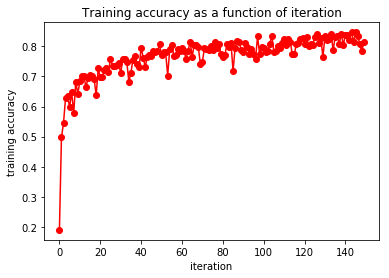

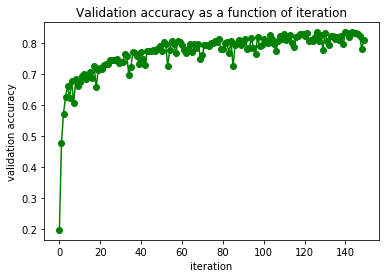

In [185]:
train_accs, val_accs = [], []
for i in range(NUM_OPT_STEPS):
    train(batch_size)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy(model))
        val_accs.append(val_accuracy(model))
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))
plot_accuracies(train_accs, val_accs)

In [186]:
for m in model.children():
    m.reset_parameters()
#optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

     0  0.19  0.19
   100  0.35  0.37
   200  0.34  0.37
   300  0.52  0.51
   400  0.51  0.49
   500  0.48  0.49
   600  0.64  0.62
   700  0.62  0.62
   800  0.57  0.56
   900  0.62  0.60
  1000  0.64  0.66
  1100  0.63  0.66
  1200  0.58  0.60
  1300  0.64  0.63
  1400  0.61  0.62
  1500  0.60  0.61
  1600  0.71  0.70
  1700  0.67  0.66
  1800  0.67  0.68
  1900  0.69  0.68
  2000  0.68  0.69
  2100  0.71  0.70
  2200  0.63  0.63
  2300  0.68  0.68
  2400  0.63  0.62
  2500  0.69  0.69
  2600  0.71  0.70
  2700  0.67  0.67
  2800  0.67  0.70
  2900  0.74  0.71
  3000  0.71  0.71
  3100  0.70  0.72
  3200  0.70  0.70
  3300  0.69  0.68
  3400  0.74  0.74
  3500  0.73  0.73
  3600  0.72  0.72
  3700  0.72  0.72
  3800  0.70  0.70
  3900  0.72  0.73
  4000  0.72  0.73
  4100  0.74  0.73
  4200  0.75  0.74
  4300  0.70  0.73
  4400  0.76  0.74
  4500  0.76  0.73
  4600  0.72  0.73
  4700  0.74  0.76
  4800  0.76  0.74
  4900  0.76  0.76
  5000  0.77  0.75
  5100  0.78  0.77
  5200  0.77

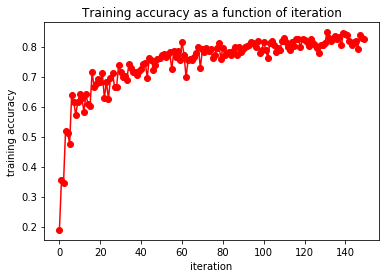

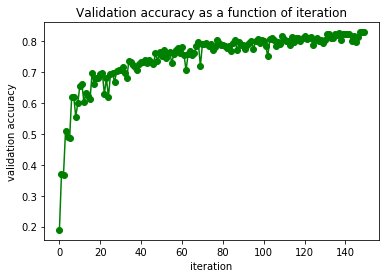

In [187]:
train_accs, val_accs = [], []
for i in range(NUM_OPT_STEPS):
    train(batch_size)
    if i % 100 == 0:
        train_accs.append(approx_train_accuracy(model))
        val_accs.append(val_accuracy(model))
        print("%6d %5.2f %5.2f" % (i, train_accs[-1], val_accs[-1]))
plot_accuracies(train_accs, val_accs)